In [48]:
import pandas as pd

In [49]:
df = pd.read_csv('Datasets\Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [51]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [52]:
df['Exited'].value_counts() 

Exited
0    7963
1    2037
Name: count, dtype: int64

In [53]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [54]:
df['Geography'].value_counts()  

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [55]:
df.drop(columns=['Surname', 'RowNumber', 'CustomerId'], inplace=True)   
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [56]:
df=pd.get_dummies(df,columns=['Geography','Gender'], drop_first=True)      
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  bool   
 10  Geography_Spain    10000 non-null  bool   
 11  Gender_Male        10000 non-null  bool   
dtypes: bool(3), float64(2), int64(7)
memory usage: 732.5 KB


In [58]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

In [59]:
y = df['Exited']
X = df.drop(columns='Exited')   

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)  

In [61]:
scalar = StandardScaler()   
X_train = scalar.fit_transform(X_train) 
X_test = scalar.transform(X_test)   

In [62]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [63]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [64]:
model = Sequential()

model.add(Dense(5, activation='relu', input_dim = X.shape[1]))
model.add(Dense(3, activation='relu'))  
model.add(Dense(1, activation='sigmoid'))   

c:\Users\ASUS\Miniconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [65]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 5)              │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 82 (328.00 B)

 Trainable params: 82 (328.00 B)

 Non-trainable params: 0 (0.00 B)

In [66]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [75]:
history = model.fit(X_train, y_train, epochs=100,validation_split=0.2)

Epoch 1/100


200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8607 - loss: 0.3345 - val_accuracy: 0.8587 - val_loss: 0.3527
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8591 - loss: 0.3396 - val_accuracy: 0.8600 - val_loss: 0.3535
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8628 - loss: 0.3332 - val_accuracy: 0.8569 - val_loss: 0.3534
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8581 - loss: 0.3438 - val_accuracy: 0.8575 - val_loss: 0.3565
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8681 - loss: 0.3370 - val_accuracy: 0.8600 - val_loss: 0.3543
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8624 - loss: 0.3379 - val_accuracy: 0.8612 - val_loss: 0.3530
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8617 - loss: 0.3411 - val_accuracy: 0.8600 - val_loss: 0.3537
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8564 - loss: 0.3475 - val_accuracy: 0.8631

In [76]:
model.layers[0].get_weights()   

[array([[ 2.5787935e-02, -2.4031676e-02,  4.8575766e-04, -3.4986034e-02,
          6.3100117e-03],
        [-1.6368268e-01, -7.4698150e-02, -1.8167146e-01,  9.1241241e-01,
         -4.9474284e-01],
        [ 4.9728453e-03, -1.8078463e-02, -3.8253020e-02,  1.1448290e-01,
          2.3090232e-02],
        [-4.1833687e-01, -3.5951641e-01, -1.3444270e-01, -5.2463233e-01,
          1.9622032e-02],
        [-5.2180839e-01, -1.6140574e+00, -8.1436074e-01, -1.1336526e+00,
         -6.6412318e-01],
        [-6.3783579e-02,  5.5608721e-03,  1.0080200e-01,  2.8565330e-02,
          2.9417571e-02],
        [ 1.4278473e-01,  1.3162683e-02,  9.6557951e-01,  1.3423765e+00,
         -1.3183647e-01],
        [-5.2004896e-02,  8.8255532e-02,  3.8579124e-01,  8.4037386e-02,
         -3.2353509e-02],
        [-8.4345281e-01,  6.7443490e-02,  5.9053749e-01, -1.1389118e-01,
          2.3510079e-01],
        [-2.3264897e-01, -5.6698322e-03,  1.8616483e-01,  6.8579040e-02,
          1.0724776e-01],
        [ 

In [77]:
model.layers[1].get_weights()

[array([[ 0.07919492,  1.1725993 ,  0.74351996],
        [-1.904129  , -1.0907149 , -1.1024343 ],
        [-0.10609657,  0.96485156,  0.38719028],
        [ 1.1787868 , -0.7319942 , -0.37942815],
        [ 0.5336144 ,  0.86517745,  1.1118896 ]], dtype=float32),
 array([-0.00720534, -0.01119406, -0.07256608], dtype=float32)]

In [78]:
y_log=model.predict(X_test)

20/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [79]:
import numpy as np
y_pred=np.where(y_log>0.5,1,0) 

In [80]:
from sklearn.metrics import accuracy_score

In [81]:
accuracy_score(y_test,y_pred)

0.8575

In [82]:
import matplotlib.pyplot as plt 

In [83]:
history.history

{'accuracy': [0.8603125214576721,
  0.8603125214576721,
  0.8612499833106995,
  0.8584374785423279,
  0.8615624904632568,
  0.8596875071525574,
  0.8600000143051147,
  0.8604687452316284,
  0.8614062666893005,
  0.8600000143051147,
  0.8609374761581421,
  0.8606250286102295,
  0.8604687452316284,
  0.8610937595367432,
  0.8592187762260437,
  0.8603125214576721,
  0.8610937595367432,
  0.8600000143051147,
  0.860156238079071,
  0.8620312213897705,
  0.8606250286102295,
  0.8609374761581421,
  0.8621875047683716,
  0.8600000143051147,
  0.8610937595367432,
  0.8623437285423279,
  0.8623437285423279,
  0.8634374737739563,
  0.8604687452316284,
  0.8610937595367432,
  0.8621875047683716,
  0.8610937595367432,
  0.8635937571525574,
  0.8621875047683716,
  0.8629687428474426,
  0.8604687452316284,
  0.862500011920929,
  0.8626562356948853,
  0.8626562356948853,
  0.8607812523841858,
  0.8603125214576721,
  0.8620312213897705,
  0.8629687428474426,
  0.8598437309265137,
  0.86328125,
  0.8618

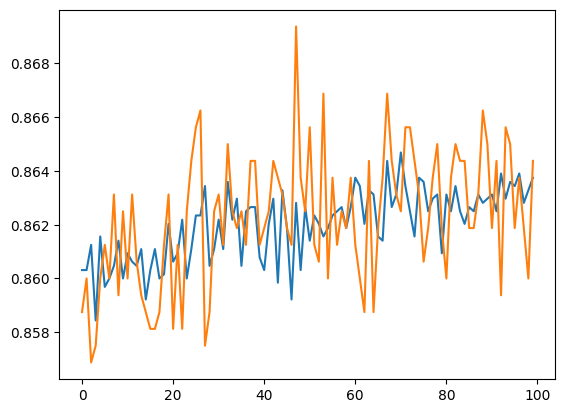

In [84]:
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy']) 

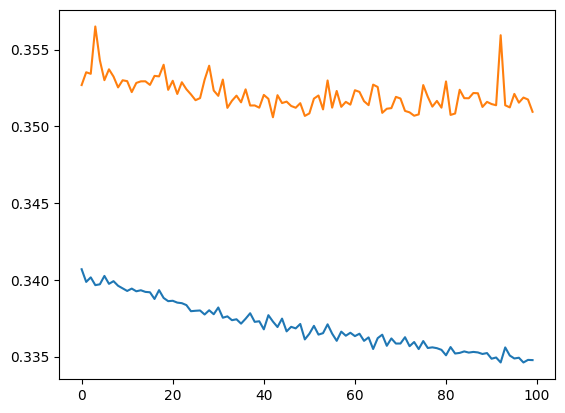

In [85]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])   